# Lead Scoring Case Study - Solution 

> In this lead scoring case study, we need to help X Education select promising leads, i.e. the leads that are most likely to convert into paying customers. 

> * Build a model to assign a lead score between 0 and 100 to each leads  
> * Customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance
> * X Education's CEO has given a ballpark of the target lead conversion rate to be around 80%


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_selection import RFE
from sklearn import metrics

# Supress warnings
warnings.filterwarnings("ignore")

### Data Understanding
>This section contains all the basic data exploration and understanding steps

In [2]:
#Import the dataset
leads = pd.read_csv('Leads.csv')

In [3]:
#Inspect the dataset
print(leads.shape)
leads.head()

(9240, 37)


Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [4]:
# column inspection:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [5]:
# Check the summary of the dataset

leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [6]:
# Check the info to see the types of the feature variables and the null values present

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# Get valid data in the columns for application_data
leads.isna().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
Tags                                             3353
What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Do Not Email                                        0
Do Not Call                 

In [8]:
print(0.5 * len(leads)) # 50% of total record count
print(0.4 * len(leads)) # 40% of total record count
print(0.3 * len(leads)) # 40% of total record count

4620.0
3696.0
2772.0


### Data Cleaning and Preparation

1. Observation:
    1. We see a lot of NULLs in the columns like, Lead Quality, Assymetric Profile Score, Assymetric Activity Score, etc
    2. There are quite a few categorical columns as well for which we will need to create dummy variables
    3. In some cases, NULL values are almost 40% and above, so we will need to treat them accordingly

2. Data Cleaning decisions
    1. We will need to eliminate the columns with a large nulls
    2. In cases where NULLS are more than 30%, we will drop the columns

Decision 1: To drop all columns with more than 30% NULL values

In [9]:
for col in leads.columns:
    if leads[col].isnull().sum() > 3000:
        leads.drop(col, 1, inplace=True)

In [10]:
# Checking percentage of missing values in remaining columns

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

Decision 2:

Based on the use case that we are trying to cater to, geographic variables are irrelevant as the calls to reach out to those leads are irrelavent to where they reside
Also, fields like Country and City have ~27% and 15% of missing values, hence we have decided to drop them from our analysis

In [11]:
leads.drop(['Country'], axis = 1, inplace = True)
leads.drop(['City'], axis = 1, inplace = True)

In [12]:
# Checking percentage of missing values in remaining columns

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

#### Data Discrepancies
Decision 3: 

Since this information is received from an online web application, there are chances that the values captured could be just the default values for the fields, to identify such a scenario, let us take a value counts of all the values in the remaining columns and inspect them:

In [13]:
# Get the value counts of all the columns

for column in leads:
    print(leads[column].astype('category').value_counts())
    print('___________________________________________________')

fffb0e5e-9f92-4017-9f42-781a69da4154    1
56453aec-3f7b-4f30-870c-8f966d393100    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
                                       ..
aa4180a5-84f1-4e67-8d90-0c8403070a59    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
Name: Prospect ID, Length: 9240, dtype: int64
___________________________________________________
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
___________________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
__________________

As observed, the columns such as Lead Profile, How did you hear about X Education, and Specialization have a value Select in them, which is most likely the default value of any drop down based menu options in an online application/form.

There are significantly high number of records in both Lead Profile and How did you hear about X education with the 'Select' value. It only makes sense to drop these columns as these columns as they/the data present in them are irrelevant for our lead generation analysis

In [14]:
leads.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

We also observed that there are quite a few columns where the data is heavily skewed towards a single value, in the order of 99-100% of the record count.


It can also be observed that more often than not these values are 'No', and it seems pretty insignificant to the analysis and the result we are trying to acheive

To that effect, we have decided to drop these columns from our model dataframe:
- Do Not Call
- Search
- Magazine
- Newspaper Article
- X Education Forums
- Newspaper
- Digital Advertisement
- Through Recommendations
- Receive More Updates About Our Courses
- Update me on Supply Chain Content
- Get updates on DM Content
- I agree to pay the amount through cheque

In [15]:
leads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

Another column has a very heavily skewed data towards a single value. So we have decided to drop this as well.
___________________________________________________
Better Career Prospects      6528

Flexibility & Convenience       2

Other                           1

Name: What matters most to you in choosing a course, dtype: int64
___________________________________________________

In [16]:
# Dropping the column 'What matters most to you in choosing a course'

leads.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [17]:
# Inspecting the dataframe for NULL values
leads.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

-------------------------------------
From the above result, we observe that "What is your current occupation" still has a very significant number of NULLs.

Going forward, we are dropping the NULL records for this column and not dropping the column right away as this might turn out to be significant in our analysis

In [18]:
leads = leads[~pd.isnull(leads['What is your current occupation'])]

In [19]:
# Inspecting the dataframe for NULL values
leads.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
Specialization                             18
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

------------------------------
We see that the number of NULL records in the columns listed above are fairly small, we have henceforth decided to just drop the NULL records for our analysis

In [20]:
# Dropping the NULL values in 'Lead Source'

leads = leads[~pd.isnull(leads['Lead Source'])]

In [21]:
# Inspecting the dataframe for NULL values
leads.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Converted                                   0
TotalVisits                               123
Total Time Spent on Website                 0
Page Views Per Visit                      123
Last Activity                             101
Specialization                             18
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [22]:
# Dropping the NULL values in 'TotalVisits'

leads = leads[~pd.isnull(leads['TotalVisits'])]

In [23]:
# Inspecting the dataframe for NULL values
leads.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [24]:
# Dropping the NULL values in 'Specialization'

leads = leads[~pd.isnull(leads['Specialization'])]

In [25]:
# Inspecting the dataframe for NULL values
leads.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

----------------------------
The dataframe is now clean of missing values and is ready for further analysis. Before moving let us check the number of records we have retained from the original dataframe post Data Cleaning and Preparation steps

In [26]:
print(len(leads.index))
print(len(leads.index)/9240)

6373
0.6897186147186147


------------------------
We have 69% of records remaninig to build our model on, which is still a very decent number of records

## Visualizing the data
Visualizing the numerical variables to look for any patterns in data that can be rectified at this stage:

In [27]:
# creating a pairplot of all the numeric variables
sns.pairplot(leads)
plt.show()

There doesn't seem to be any strong correlation between any of the variables we are using for the analysis

In [28]:
# Inspecting the dataset
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email  Converted  TotalVisits  \
0      Olark Chat           No          0          0.0   
1  Organic Search           No          0          5.0   
2  Direct Traffic           No          1          2.0   
3  Direct Traffic           No          0          1.0   
4          Google           No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0                   Select                      Unemployed   
1                   Select                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4                   Select                      Unemployed   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

Here we have realised that the Prospect ID and Lead Number are unique values for each record in the dataset and are hence are not important for our analysis or Model Building

In [29]:
# Dropping the columns:
leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [30]:
# Inspecting the dataset
leads.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Select   
1             Email Opened                   Select   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Select   

  What is your current occupation A free copy of Mastering The Interview  \
0                      Unemployed                                     No   
1                      Unemployed                                     No   
2                         Student                                    Yes   
3                      Unemployed                                     No   
4                      Unemployed                                     No   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

In [31]:
leads.shape

(6373, 12)

In [32]:
#checking the datatypes for the variables:
leads.dtypes

Lead Origin                                object
Lead Source                                object
Do Not Email                               object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
A free copy of Mastering The Interview     object
Last Notable Activity                      object
dtype: object

## Data preparation/ pre-processing

This step shall contain:
- To create dummy variables for all the categorical variables which have descriptive (non-binary) data
- Divide the dataset into train and test sets
- Perform scaling on the dataset
- Divide the data into X and y

### Creating Dummy Variables

Based on the datatypes result captured earlier, we will need to create dummy variables for all columns with datatype 'object'
We need to convert these levels into integers as well, hence the dummy variables

In [33]:
# Storing the columns which are of type 'object' in a variable to view

dummy = leads.loc[:, leads.dtypes == 'object']
dummy.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [34]:
# Create dummy variables using the 'get_dummies' command
dummies = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
leads = pd.concat([leads, dummies], axis=1)

In [35]:
# The variable Specialization has a value 'Select' in it, hence dropping that explicitly from the dataset

specialization = pd.get_dummies(leads['Specialization'], prefix = 'Specialization')
specialization = specialization.drop(['Specialization_Select'], 1)
leads = pd.concat([leads, specialization], axis = 1)

In [36]:
# Drop the variables for which the dummy variables have been created

leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1, inplace = True)

In [37]:
#Inspecting the dataset
leads.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  ...  Specialization_IT Projects Management  \
0                   0  ...                                      0   
1                   0  ...                                      0   
2                   0  ...                                      0   
3                   0  ...                                      0   
4                   1  ...                                      0   

   Specialization_International Business  Specialization_Marketing Management  \
0                                      0                                    0   
1                                      0                                    0   
2                                      0                                    0   
3                                      0                                    0   
4                                      0                                    0   

   Specialization_Media and Advertising  Specialization_Operations Management  \
0                                     0                                     0   
1                                     0                                     0   
2                                     0                                     0   
3                                     1                                     0   
4                                     0                                     0   

   Specialization_Retail Management  Specialization_Rural and Agribusiness  \
0                                 0                                      0   
1                                 0                                      0   
2                                 0                                      0   
3                                 0                                      0   
4                                 0                                      0   

   Specialization_Services Excellence  Specialization_Supply Chain Management  \
0                                   0                                       0   
1                                   0                                       0   
2                                   0                                       0   
3                                   0                                       0   
4                                   0                                       0   

   Specialization_Travel and Tourism  
0                                  0  
1                                  0  
2                                  0  
3                                  0  
4                                  0  

[5 rows x 75 columns]

In [38]:
#Inspecting the dataset columns
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 75 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             6373 non-null   int64  
 1   TotalVisits                                           6373 non-null   float64
 2   Total Time Spent on Website                           6373 non-null   int64  
 3   Page Views Per Visit                                  6373 non-null   float64
 4   Lead Origin_Landing Page Submission                   6373 non-null   uint8  
 5   Lead Origin_Lead Add Form                             6373 non-null   uint8  
 6   Lead Origin_Lead Import                               6373 non-null   uint8  
 7   Lead Source_Direct Traffic                            6373 non-null   uint8  
 8   Lead Source_Facebook                                  6373

### Splitting the dataset into Train and Test sets

In [39]:
#Splitting the dataset into train and test datasets, 70% training and 30% testing
np.random.seed(0)
df_train, df_test = train_test_split(leads, train_size = 0.7, test_size = 0.3, random_state = 100)

In [40]:
df_train.shape

(4461, 75)

In [41]:
df_test.shape

(1912, 75)

### Rescaling using MinMax scaling

In [42]:
scaler = MinMaxScaler()

In [43]:
#inspecting the train dataset and ensuring the proper columns are getting scaled
df_train.head()

Converted  TotalVisits  Total Time Spent on Website  \
8003          0          4.0                           67   
218           0          4.0                          187   
4171          1          6.0                           78   
4037          1          0.0                            0   
3660          1          0.0                            0   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
8003                   2.0                                    1   
218                    4.0                                    1   
4171                   6.0                                    1   
4037                   0.0                                    0   
3660                   0.0                                    0   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
8003                          0                        0   
218                           0                        0   
4171                          0                        0   
4037                          0                        0   
3660                          1                        0   

      Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
8003                           1                     0                   0   
218                            1                     0                   0   
4171                           1                     0                   0   
4037                           0                     0                   0   
3660                           0                     0                   0   

      ...  Specialization_IT Projects Management  \
8003  ...                                      1   
218   ...                                      0   
4171  ...                                      0   
4037  ...                                      0   
3660  ...                                      0   

      Specialization_International Business  \
8003                                      0   
218                                       0   
4171                                      0   
4037                                      0   
3660                                      0   

      Specialization_Marketing Management  \
8003                                    0   
218                                     0   
4171                                    0   
4037                                    0   
3660                                    0   

      Specialization_Media and Advertising  \
8003                                     0   
218                                      0   
4171                                     0   
4037                                     0   
3660                                     0   

      Specialization_Operations Management  Specialization_Retail Management  \
8003                                     0                                 0   
218                                      0                                 0   
4171                                     0                                 0   
4037                                     0                                 0   
3660                                     0                                 0   

      Specialization_Rural and Agribusiness  \
8003                                      0   
218                                       0   
4171                                      0   
4037                                      0   
3660                                      0   

      Specialization_Services Excellence  \
8003                                   0   
218                                    0   
4171                                   0   
4037                                   0   
3660                                   0   

      Specialization_Supply Chain Management  \
8003                                       0   
218                                        0   
4171                                       0   
4037                                     

In [44]:
#Applying scalar to the columns except the ones with binary values (1 and 0)
num_vars = ['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [45]:
df_train.head()

Converted  TotalVisits  Total Time Spent on Website  \
8003          0     0.015936                     0.029489   
218           0     0.015936                     0.082306   
4171          1     0.023904                     0.034331   
4037          1     0.000000                     0.000000   
3660          1     0.000000                     0.000000   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
8003                 0.125                                    1   
218                  0.250                                    1   
4171                 0.375                                    1   
4037                 0.000                                    0   
3660                 0.000                                    0   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
8003                          0                        0   
218                           0                        0   
4171                          0                        0   
4037                          0                        0   
3660                          1                        0   

      Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
8003                           1                     0                   0   
218                            1                     0                   0   
4171                           1                     0                   0   
4037                           0                     0                   0   
3660                           0                     0                   0   

      ...  Specialization_IT Projects Management  \
8003  ...                                      1   
218   ...                                      0   
4171  ...                                      0   
4037  ...                                      0   
3660  ...                                      0   

      Specialization_International Business  \
8003                                      0   
218                                       0   
4171                                      0   
4037                                      0   
3660                                      0   

      Specialization_Marketing Management  \
8003                                    0   
218                                     0   
4171                                    0   
4037                                    0   
3660                                    0   

      Specialization_Media and Advertising  \
8003                                     0   
218                                      0   
4171                                     0   
4037                                     0   
3660                                     0   

      Specialization_Operations Management  Specialization_Retail Management  \
8003                                     0                                 0   
218                                      0                                 0   
4171                                     0                                 0   
4037                                     0                                 0   
3660                                     0                                 0   

      Specialization_Rural and Agribusiness  \
8003                                      0   
218                                       0   
4171                                      0   
4037                                      0   
3660                                      0   

      Specialization_Services Excellence  \
8003                                   0   
218                                    0   
4171                                   0   
4037                                   0   
3660                                   0   

      Specialization_Supply Chain Management  \
8003                                       0   
218                                        0   
4171                                       0   
4037                                     

In [46]:
df_train.describe()

Converted  TotalVisits  Total Time Spent on Website  \
count  4461.000000  4461.000000                  4461.000000   
mean      0.481731     0.014528                     0.234426   
std       0.499722     0.021712                     0.248618   
min       0.000000     0.000000                     0.000000   
25%       0.000000     0.003984                     0.014525   
50%       0.000000     0.011952                     0.125440   
75%       1.000000     0.019920                     0.448504   
max       1.000000     1.000000                     1.000000   

       Page Views Per Visit  Lead Origin_Landing Page Submission  \
count           4461.000000                          4461.000000   
mean               0.153604                             0.564672   
std                0.127910                             0.495856   
min                0.000000                             0.000000   
25%                0.062500                             0.000000   
50%                0.125000                             1.000000   
75%                0.229375                             1.000000   
max                1.000000                             1.000000   

       Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
count                4461.000000              4461.000000   
mean                    0.094149                 0.003587   
std                     0.292069                 0.059788   
min                     0.000000                 0.000000   
25%                     0.000000                 0.000000   
50%                     0.000000                 0.000000   
75%                     0.000000                 0.000000   
max                     1.000000                 1.000000   

       Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
count                 4461.000000           4461.000000         4461.000000   
mean                     0.290069              0.003587            0.320108   
std                      0.453845              0.059788            0.466570   
min                      0.000000              0.000000            0.000000   
25%                      0.000000              0.000000            0.000000   
50%                      0.000000              0.000000            0.000000   
75%                      1.000000              0.000000            1.000000   
max                      1.000000              1.000000            1.000000   

       ...  Specialization_IT Projects Management  \
count  ...                            4461.000000   
mean   ...                               0.044385   
std    ...                               0.205971   
min    ...                               0.000000   
25%    ...                               0.000000   
50%    ...                               0.000000   
75%    ...                               0.000000   
max    ...                               1.000000   

       Specialization_International Business  \
count                            4461.000000   
mean                                0.023089   
std                                 0.150203   
min                                 0.000000   
25%                                 0.000000   
50%                                 0.000000   
75%                                 0.000000   
max                                 1.000000   

       Specialization_Marketing Management  \
count                          4461.000000   
mean                              0.104237   
std                               0.305602   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                               1.000000   

       Specialization_Media and Advertising  \
count                           4461.000000   
mean                               0.023313   
std                                0.150913   
min                                0.000000

### Dividing into X and Y sets for building the model

In [47]:
y_train = df_train.pop('Converted')
X_train = df_train

### Looking at the correlations

Let's now look at the correlations. Since the number of variables are pretty high, it isn't ideal for us to view it on a heatmap as demonstrated, hence taking a look at it on a tabular format

In [48]:
#checking the correlation coefficients to look out for variables that are highly correlated
plt.figure(figsize = (200, 100))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

#### Tabular View:

In [49]:
leads.corr()

Converted  TotalVisits  \
Converted                                1.000000     0.005651   
TotalVisits                              0.005651     1.000000   
Total Time Spent on Website              0.313338     0.202551   
Page Views Per Visit                    -0.063362     0.489039   
Lead Origin_Landing Page Submission     -0.117563     0.267954   
...                                           ...          ...   
Specialization_Retail Management        -0.018603     0.014223   
Specialization_Rural and Agribusiness    0.006964     0.068015   
Specialization_Services Excellence      -0.005142     0.015114   
Specialization_Supply Chain Management   0.005785     0.063383   
Specialization_Travel and Tourism       -0.011762     0.064384   

                                        Total Time Spent on Website  \
Converted                                                  0.313338   
TotalVisits                                                0.202551   
Total Time Spent on Website                                1.000000   
Page Views Per Visit                                       0.303870   
Lead Origin_Landing Page Submission                        0.275606   
...                                                             ...   
Specialization_Retail Management                           0.024919   
Specialization_Rural and Agribusiness                      0.018767   
Specialization_Services Excellence                         0.003203   
Specialization_Supply Chain Management                     0.045386   
Specialization_Travel and Tourism                          0.037867   

                                        Page Views Per Visit  \
Converted                                          -0.063362   
TotalVisits                                         0.489039   
Total Time Spent on Website                         0.303870   
Page Views Per Visit                                1.000000   
Lead Origin_Landing Page Submission                 0.458168   
...                                                      ...   
Specialization_Retail Management                    0.026099   
Specialization_Rural and Agribusiness               0.027465   
Specialization_Services Excellence                  0.015230   
Specialization_Supply Chain Management              0.052972   
Specialization_Travel and Tourism                   0.111284   

                                        Lead Origin_Landing Page Submission  \
Converted                                                         -0.117563   
TotalVisits                                                        0.267954   
Total Time Spent on Website                                        0.275606   
Page Views Per Visit                                               0.458168   
Lead Origin_Landing Page Submission                                1.000000   
...                                                                     ...   
Specialization_Retail Management                                   0.070983   
Specialization_Rural and Agribusiness                              0.050077   
Specialization_Services Excellence                                 0.039433   
Specialization_Supply Chain Management                             0.111610   
Specialization_Travel and Tourism                                  0.094875   

                                        Lead Origin_Lead Add Form  \
Converted                                                0.288666   
TotalVisits                                             -0.208375   
Total Time Spent on Website                             -0.249493   
Page Views Per Visit                                    -0.340185   
Lead Origin_Landing Page Submission                     -0.363764   
...                                                           ...   
Specialization_Retail Management                        -0.025339   
Specialization_Rural and Agribusiness                   -0.018872   
Specialization_Services Excellence                     

### Building the model

Given that the dataset has 75 columns, we have decided to use the RFE (Recursive Feature Elimination) technique to narrow down to the 15 most significant variables and then manually eliminate the remaining insignificant variables

In [50]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

# Running RFE with the output number of the variable equal to 15
rfe = RFE(logreg, n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

##### Inspecting the variables selected and ranked by RFE

In [51]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 52),
 ('Lead Source_Direct Traffic', False, 24),
 ('Lead Source_Facebook', False, 51),
 ('Lead Source_Google', False, 36),
 ('Lead Source_Live Chat', False, 44),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Pay per Click Ads', False, 43),
 ('Lead Source_Press_Release', False, 53),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 37),
 ('Lead Source_Social Media', False, 58),
 ('Lead Source_WeLearn', False, 42),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 33),
 ('Lead Source_testone', False, 38),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 25),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Link C

##### Listing the selected and rejected variables

In [52]:
#selected variables
X_train.columns[rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [53]:
#Rejected variables
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_testone', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       '

#### Building the model

In [54]:
#lets check the accuracy, so that we can use this as our point of reference:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
print("Training Accuracy")
print(logreg.score(X_train,y_train))

Training Accuracy
0.8004931629679444


### Model 1:

In [55]:
# Creating X_train_rfe dataframe with RFE selected variables
col = X_train.columns[rfe.support_]
X_train = X_train[col]

In [56]:
# Fiting a logistic Regression model on X_train after adding a constant and output the summary
import statsmodels.api as sm 
#Adding a constant
X_train_sm = sm.add_constant(X_train)

In [57]:
#Fitting the model
lgm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = lgm.fit()

In [58]:
#Summary of the logistic model
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.8
Date:                Fri, 12 Nov 2021   Deviance:                       4145.5
Time:                        12:06:19   Pearson chi2:                 4.84e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0061      0.600     -1.677      0.094      -2.182       0.170
TotalVisits                                             11.3439      2.682      4.230      0.000       6.088      16.600
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                2.9483      1.191      2.475      0.013       0.614       5.283
Lead Source_Olark Chat                                   1.4584      0.122     11.962      0.000       1.219       1.697
Lead Source_Reference                                    1.2994      1.214      1.070      0.285      -1.080       3.679
Lead Source_Welingak Website                             3.4159      1.558      2.192      0.028       0.362       6.470
Do Not Email_Yes                                        -1.5053      0.193     -7.781      0.000      -1.884      -1.126
Last Activity_Had a Phone Conversation                   1.0397      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6492   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1544      0.630     -1.831      0.067      -2.390       0.081
What is your current occupation_Unemployed              -1.3395      0.594     -2.254      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1932   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7868      0.807      3.453      0.001       1.205       4.369
========================================================================================================================
"""

#### Checking VIFs of the model:

In [59]:
# Calculating VIFs for Model 1:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2                           Lead Origin_Lead Add Form  84.19
4                               Lead Source_Reference  65.18
5                        Lead Source_Welingak Website  20.03
11         What is your current occupation_Unemployed   3.65
7              Last Activity_Had a Phone Conversation   2.44
13     Last Notable Activity_Had a Phone Conversation   2.43
1                         Total Time Spent on Website   2.38
0                                         TotalVisits   1.62
8                              Last Activity_SMS Sent   1.59
12  What is your current occupation_Working Profes...   1.56
3                              Lead Source_Olark Chat   1.44
6                                    Do Not Email_Yes   1.09
10            What is your current occupation_Student   1.09
9           What is your current occupation_Housewife   1.01
14                  Last Notable Activity_Unreachable   1.01

#### Observation and Decision:
##### There seem to be quite a few features with high p-value and high VIF

Decision:
1. Remove the feature with both high p-value and high VIF
2. In this case, it would be 'Lead Source_Reference'

In [60]:
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

#### Model 2: Rebuilding and fitting the model

In [61]:
lgm = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = lgm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2073.2
Date:                Fri, 12 Nov 2021   Deviance:                       4146.5
Time:                        12:06:20   Pearson chi2:                 4.82e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0057      0.600     -1.677      0.094      -2.181       0.170
TotalVisits                                             11.3428      2.682      4.229      0.000       6.086      16.599
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                4.2084      0.259     16.277      0.000       3.702       4.715
Lead Source_Olark Chat                                   1.4583      0.122     11.960      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5036      0.193     -7.779      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   1.0398      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6511   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1537      0.630     -1.830      0.067      -2.389       0.082
What is your current occupation_Unemployed              -1.3401      0.594     -2.255      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2748      0.623      2.046      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1934   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7872      0.807      3.454      0.001       1.205       4.369
========================================================================================================================
"""

#### Checking VIFs of the model:

In [62]:
# Calculating VIFs for Model 2:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
10         What is your current occupation_Unemployed  3.65
6              Last Activity_Had a Phone Conversation  2.44
12     Last Notable Activity_Had a Phone Conversation  2.43
1                         Total Time Spent on Website  2.38
2                           Lead Origin_Lead Add Form  1.71
0                                         TotalVisits  1.62
7                              Last Activity_SMS Sent  1.59
11  What is your current occupation_Working Profes...  1.56
3                              Lead Source_Olark Chat  1.44
4                        Lead Source_Welingak Website  1.33
5                                    Do Not Email_Yes  1.09
9             What is your current occupation_Student  1.09
8           What is your current occupation_Housewife  1.01
13                  Last Notable Activity_Unreachable  1.01

Decision:

1. All VIFs are now under 5, so we can now focus on removing high p-value features first (most insignificant ones, above 0.05)
2. Rebuild the model after removing "Last Notable Activity_Had a Phone Conversation", which has a p-value of 0.999 and a VIF of 2.43 as well, which is relatively higher compared to its peers

In [63]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

#### Model 3: Rebuilding and fitting the model

In [64]:
lgm = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = lgm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2076.1
Date:                Fri, 12 Nov 2021   Deviance:                       4152.2
Time:                        12:06:20   Pearson chi2:                 4.82e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0069      0.600     -1.679      0.093      -2.182       0.168
TotalVisits                                             11.4551      2.686      4.265      0.000       6.191      16.720
Total Time Spent on Website                              4.4237      0.185     23.900      0.000       4.061       4.787
Lead Origin_Lead Add Form                                4.2082      0.259     16.276      0.000       3.701       4.715
Lead Source_Olark Chat                                   1.4581      0.122     11.958      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5037      0.193     -7.780      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   2.7502      0.802      3.430      0.001       1.179       4.322
Last Activity_SMS Sent                                   1.1826      0.082     14.364      0.000       1.021       1.344
What is your current occupation_Housewife               21.6525   1.49e+04      0.001      0.999   -2.91e+04    2.91e+04
What is your current occupation_Student                 -1.1520      0.630     -1.828      0.068      -2.387       0.083
What is your current occupation_Unemployed              -1.3385      0.594     -2.253      0.024      -2.503      -0.174
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.495
Last Notable Activity_Unreachable                        2.7862      0.807      3.453      0.001       1.205       4.368
========================================================================================================================
"""

#### Checking VIFs of the model:

In [65]:
# Calculating VIFs for Model 3:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
10         What is your current occupation_Unemployed  3.65
1                         Total Time Spent on Website  2.38
2                           Lead Origin_Lead Add Form  1.71
0                                         TotalVisits  1.62
7                              Last Activity_SMS Sent  1.59
11  What is your current occupation_Working Profes...  1.56
3                              Lead Source_Olark Chat  1.44
4                        Lead Source_Welingak Website  1.33
5                                    Do Not Email_Yes  1.09
9             What is your current occupation_Student  1.09
6              Last Activity_Had a Phone Conversation  1.01
8           What is your current occupation_Housewife  1.01
12                  Last Notable Activity_Unreachable  1.01

Decision:

1. "What is your current occupation_Housewife" has a high p-value of 0.999, which renders it pretty insignificant, hence we are dropping this from the dataset and re-building the model

In [66]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

#### Model 4: Rebuilding and fitting the model

In [67]:
lgm = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = lgm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2078.3
Date:                Fri, 12 Nov 2021   Deviance:                       4156.7
Time:                        12:06:21   Pearson chi2:                 4.83e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4528      0.554     -0.818      0.413      -1.538       0.632
TotalVisits                                             11.2586      2.672      4.214      0.000       6.023      16.495
Total Time Spent on Website                              4.4217      0.185     23.898      0.000       4.059       4.784
Lead Origin_Lead Add Form                                4.2057      0.258     16.274      0.000       3.699       4.712
Lead Source_Olark Chat                                   1.4530      0.122     11.930      0.000       1.214       1.692
Lead Source_Welingak Website                             2.1541      1.037      2.078      0.038       0.122       4.186
Do Not Email_Yes                                        -1.5063      0.193     -7.785      0.000      -1.886      -1.127
Last Activity_Had a Phone Conversation                   2.7515      0.802      3.432      0.001       1.180       4.323
Last Activity_SMS Sent                                   1.1823      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Student                 -1.7017      0.588     -2.893      0.004      -2.855      -0.549
What is your current occupation_Unemployed              -1.8879      0.550     -3.435      0.001      -2.965      -0.811
What is your current occupation_Working Professional     0.7246      0.581      1.248      0.212      -0.413       1.862
Last Notable Activity_Unreachable                        2.7834      0.807      3.448      0.001       1.201       4.365
========================================================================================================================
"""

#### Checking VIFs of the model:

In [68]:
# Calculating VIFs for Model 4:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9          What is your current occupation_Unemployed  3.64
1                         Total Time Spent on Website  2.37
2                           Lead Origin_Lead Add Form  1.70
0                                         TotalVisits  1.62
7                              Last Activity_SMS Sent  1.59
10  What is your current occupation_Working Profes...  1.56
3                              Lead Source_Olark Chat  1.44
4                        Lead Source_Welingak Website  1.33
5                                    Do Not Email_Yes  1.09
8             What is your current occupation_Student  1.09
6              Last Activity_Had a Phone Conversation  1.01
11                  Last Notable Activity_Unreachable  1.01

Decision:

1. "What is your current occupation_Working Professional" has a high p-value of 0.212, which renders it pretty insignificant, hence we are dropping this from the dataset and re-building the model
2. Since VIF values are below 4, we shall continue with p-value scores

In [69]:
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

#### Model 5: Rebuilding and fitting the model

In [70]:
lgm = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = lgm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.1
Date:                Fri, 12 Nov 2021   Deviance:                       4158.1
Time:                        12:06:22   Pearson chi2:                 4.80e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2040      0.196      1.043      0.297      -0.179       0.587
TotalVisits                                   11.1489      2.665      4.184      0.000       5.926      16.371
Total Time Spent on Website                    4.4223      0.185     23.899      0.000       4.060       4.785
Lead Origin_Lead Add Form                      4.2051      0.258     16.275      0.000       3.699       4.712
Lead Source_Olark Chat                         1.4526      0.122     11.934      0.000       1.214       1.691
Lead Source_Welingak Website                   2.1526      1.037      2.076      0.038       0.121       4.185
Do Not Email_Yes                              -1.5037      0.193     -7.774      0.000      -1.883      -1.125
Last Activity_Had a Phone Conversation         2.7552      0.802      3.438      0.001       1.184       4.326
Last Activity_SMS Sent                         1.1856      0.082     14.421      0.000       1.024       1.347
What is your current occupation_Student       -2.3578      0.281     -8.392      0.000      -2.908      -1.807
What is your current occupation_Unemployed    -2.5445      0.186    -13.699      0.000      -2.908      -2.180
Last Notable Activity_Unreachable              2.7846      0.807      3.449      0.001       1.202       4.367
==============================================================================================================
"""

#### Checking VIFs of the model:

In [71]:
# Calculating VIFs for Model 5:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9   What is your current occupation_Unemployed  2.82
1                  Total Time Spent on Website  2.00
0                                  TotalVisits  1.54
7                       Last Activity_SMS Sent  1.51
2                    Lead Origin_Lead Add Form  1.45
3                       Lead Source_Olark Chat  1.33
4                 Lead Source_Welingak Website  1.30
5                             Do Not Email_Yes  1.08
8      What is your current occupation_Student  1.06
6       Last Activity_Had a Phone Conversation  1.01
10           Last Notable Activity_Unreachable  1.01

In [72]:
#checking accuracy of the model:
logreg.fit(X_train,y_train)
print("Training Acccuracy")
print(logreg.score(X_train,y_train))

Training Acccuracy
0.7861466039004708


------------------
We can see that the accuracy of the training model has dropped to 78% from the inital 80%, which should still be fine for our case study.

Let us try to rebuild the model post removing another feature, "Lead Source_Welingak Website", compared to the rest of the features, it still has a higher p-value.

Let us check if there are any improvements on the accuracy score:

---------------

In [73]:
X_train.drop('Lead Source_Welingak Website', axis = 1, inplace = True)

#### Model 6: Rebuilding and fitting the model

In [74]:
lgm = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = lgm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4450
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2083.1
Date:                Fri, 12 Nov 2021   Deviance:                       4166.1
Time:                        12:06:22   Pearson chi2:                 5.01e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.1952      0.196      0.998      0.319      -0.188       0.579
TotalVisits                                   11.1485      2.666      4.182      0.000       5.924      16.373
Total Time Spent on Website                    4.4222      0.185     23.898      0.000       4.060       4.785
Lead Origin_Lead Add Form                      4.5265      0.249     18.157      0.000       4.038       5.015
Lead Source_Olark Chat                         1.4529      0.122     11.935      0.000       1.214       1.692
Do Not Email_Yes                              -1.4929      0.192     -7.773      0.000      -1.869      -1.116
Last Activity_Had a Phone Conversation         2.7565      0.801      3.439      0.001       1.186       4.327
Last Activity_SMS Sent                         1.1893      0.082     14.478      0.000       1.028       1.350
What is your current occupation_Student       -2.3575      0.282     -8.369      0.000      -2.910      -1.805
What is your current occupation_Unemployed    -2.5368      0.186    -13.642      0.000      -2.901      -2.172
Last Notable Activity_Unreachable              2.7839      0.808      3.447      0.001       1.201       4.367
==============================================================================================================
"""

#### Checking VIFs of the model:

In [75]:
# Calculating VIFs for Model 6:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
8  What is your current occupation_Unemployed  2.80
1                 Total Time Spent on Website  1.99
0                                 TotalVisits  1.54
6                      Last Activity_SMS Sent  1.51
3                      Lead Source_Olark Chat  1.33
2                   Lead Origin_Lead Add Form  1.19
4                            Do Not Email_Yes  1.08
7     What is your current occupation_Student  1.06
5      Last Activity_Had a Phone Conversation  1.01
9           Last Notable Activity_Unreachable  1.01

In [76]:
#checking accuracy of the model:
logreg.fit(X_train,y_train)
print("Training Acccuracy")
print(logreg.score(X_train,y_train))

Training Acccuracy
0.7861466039004708


##### There doesn't seem to be any impact on the training accuracy in Model 5 and Model 6.
##### We have decided to go ahead with Model 6 for the evaluation phase

### Model Evaluation:

We shall now proceed with making predictions using this final set of features

In [77]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

8003    0.300657
218     0.141863
4171    0.127502
4037    0.291393
3660    0.966890
207     0.194246
2044    0.177906
6411    0.949033
6498    0.076151
2085    0.898890
dtype: float64

In [78]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.30065706, 0.14186277, 0.12750206, 0.29139259, 0.96689002,
       0.19424564, 0.1779058 , 0.9490331 , 0.07615133, 0.8988899 ])

#### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [79]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

Converted  Conversion_Prob
0          0         0.300657
1          0         0.141863
2          1         0.127502
3          1         0.291393
4          1         0.966890

Now that we have the converted vs Conversion probability of the leads, let's take a cut-off point of 0.5 and flag it:

##### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [80]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Inspecting the dataset
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted
0          0         0.300657          0
1          0         0.141863          0
2          1         0.127502          0
3          1         0.291393          0
4          1         0.966890          1

In the above steps, we have completed:
1. Conversion probabilities of the lead
2. Conversion predictions using that

Let's go ahead with evaluating the model:

In [81]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1929  383]
 [ 560 1589]]


In [82]:
# Predicted     not converted    converted
# Actual
# not converted        1929      383
# converted            560       1589  

In [83]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7886124187401928


In [84]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [85]:
# Calculate the sensitivity

TP/(TP+FN)

0.739413680781759

In [86]:
# Calculate the specificity

TN/(TN+FP)

0.8343425605536332

##### The sensitivity of the model is ~74%, which is fairly decent and Specificity is ~83%. A higher specificity here means that there are going to be fewer false positive results, which is a good measure of the model.

The values calculated for sensitivity and specificity are based on a cut-off point of 0.5 that was chosen arbitrarily. This was done to loosely check the model performance. To even better the results, we will need to optimize this even further and this is where the ROC curve comes into the picture.

Let's plot the ROC and check the Area under the curve:

In [87]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [88]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

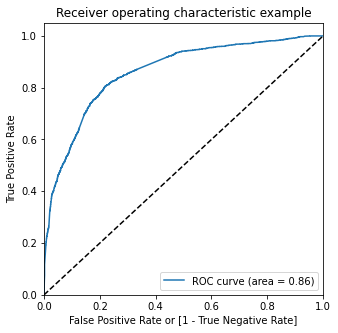

In [89]:
#Calling the ROC function and plotting the curve
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

##### The area under the curve of the ROC is 0.86 which is quite good. The model created seems to be good

Let us now find the optimal cut-off point

In [90]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.300657          0    1    1    1    1    0    0    0   
1          0         0.141863          0    1    1    0    0    0    0    0   
2          1         0.127502          0    1    1    0    0    0    0    0   
3          1         0.291393          0    1    1    1    0    0    0    0   
4          1         0.966890          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    1    1    1

In [91]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity 
# For different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.481731     1.000000     0.000000
0.1   0.1  0.526564     0.994416     0.091696
0.2   0.2  0.698498     0.944160     0.470156
0.3   0.3  0.767541     0.865984     0.676038
0.4   0.4  0.791527     0.810610     0.773789
0.5   0.5  0.788612     0.739414     0.834343
0.6   0.6  0.757229     0.624011     0.881055
0.7   0.7  0.735485     0.544439     0.913062
0.8   0.8  0.711275     0.452769     0.951557
0.9   0.9  0.637301     0.265240     0.983131


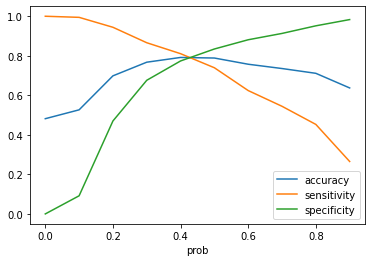

In [92]:
#Plotting the cross-over point:
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

As you can see that around 0.42, you get the optimal values of the three metrics. So let's choose 0.42 as our cutoff now.

In [93]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.300657          0    1    1    1    1    0    0    0   
1          0         0.141863          0    1    1    0    0    0    0    0   
2          1         0.127502          0    1    1    0    0    0    0    0   
3          1         0.291393          0    1    1    1    0    0    0    0   
4          1         0.966890          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    1    1    1                1

In [94]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7908540685944856

In [95]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1822,  490],
       [ 443, 1706]], dtype=int64)

In [96]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [97]:
# Calculate Sensitivity

TP/(TP+FN)

0.7938576081898557

In [98]:
# Calculate Specificity

TN/(TN+FP)

0.7880622837370242

##### All the 3 metrics are around 79% mark. The cut-off point of 0.42 looks like a good number to go ahead

## Making Predictions on the Test Set

In [99]:
# Scale the test set as well using just 'transform'
num_vars = ['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [100]:
df_test.describe()

Converted  TotalVisits  Total Time Spent on Website  \
count  1912.000000  1912.000000                  1912.000000   
mean      0.479079     0.014232                     0.238254   
std       0.499693     0.015770                     0.249417   
min       0.000000     0.000000                     0.000000   
25%       0.000000     0.007968                     0.016285   
50%       0.000000     0.011952                     0.128961   
75%       1.000000     0.019920                     0.453455   
max       1.000000     0.294821                     0.991637   

       Page Views Per Visit  Lead Origin_Landing Page Submission  \
count           1912.000000                          1912.000000   
mean               0.158354                             0.578452   
std                0.151606                             0.493936   
min                0.000000                             0.000000   
25%                0.062500                             0.000000   
50%                0.125000                             1.000000   
75%                0.218750                             1.000000   
max                3.437500                             1.000000   

       Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
count                1912.000000              1912.000000   
mean                    0.084205                 0.005753   
std                     0.277768                 0.075651   
min                     0.000000                 0.000000   
25%                     0.000000                 0.000000   
50%                     0.000000                 0.000000   
75%                     0.000000                 0.000000   
max                     1.000000                 1.000000   

       Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
count                 1912.000000           1912.000000         1912.000000   
mean                     0.302824              0.006276            0.324268   
std                      0.459600              0.078994            0.468223   
min                      0.000000              0.000000            0.000000   
25%                      0.000000              0.000000            0.000000   
50%                      0.000000              0.000000            0.000000   
75%                      1.000000              0.000000            1.000000   
max                      1.000000              1.000000            1.000000   

       ...  Specialization_IT Projects Management  \
count  ...                            1912.000000   
mean   ...                               0.041841   
std    ...                               0.200278   
min    ...                               0.000000   
25%    ...                               0.000000   
50%    ...                               0.000000   
75%    ...                               0.000000   
max    ...                               1.000000   

       Specialization_International Business  \
count                            1912.000000   
mean                                0.017259   
std                                 0.130270   
min                                 0.000000   
25%                                 0.000000   
50%                                 0.000000   
75%                                 0.000000   
max                                 1.000000   

       Specialization_Marketing Management  \
count                          1912.000000   
mean                              0.103556   
std                               0.304764   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                               1.000000   

       Specialization_Media and Advertising  \
count                           1912.000000   
mean                               0.029812   
std                                0.170112   
min                                0.000000

#### Dividing into X_test and y_test

In [101]:
X_test = df_test[col]
y_test = df_test.pop('Converted')

In [102]:
X_test.head()

TotalVisits  Total Time Spent on Website  Lead Origin_Lead Add Form  \
4771     0.000000                     0.000000                          1   
6122     0.027888                     0.029049                          0   
9202     0.015936                     0.416813                          0   
6570     0.011952                     0.378961                          0   
2668     0.031873                     0.395246                          0   

      Lead Source_Olark Chat  Lead Source_Reference  \
4771                       0                      1   
6122                       0                      0   
9202                       0                      0   
6570                       0                      0   
2668                       0                      0   

      Lead Source_Welingak Website  Do Not Email_Yes  \
4771                             0                 0   
6122                             0                 0   
9202                             0                 0   
6570                             0                 1   
2668                             0                 0   

      Last Activity_Had a Phone Conversation  Last Activity_SMS Sent  \
4771                                       0                       1   
6122                                       0                       0   
9202                                       0                       1   
6570                                       0                       1   
2668                                       0                       1   

      What is your current occupation_Housewife  \
4771                                          0   
6122                                          0   
9202                                          0   
6570                                          0   
2668                                          0   

      What is your current occupation_Student  \
4771                                        0   
6122                                        0   
9202                                        0   
6570                                        0   
2668                                        0   

      What is your current occupation_Unemployed  \
4771                                           0   
6122                                           1   
9202                                           1   
6570                                           1   
2668                                           1   

      What is your current occupation_Working Professional  \
4771                                                  1      
6122                                                  0      
9202                                                  0      
6570                                                  0      
2668                                                  0      

      Last Notable Activity_Had a Phone Conversation  \
4771                                               0   
6122                                               0   
9202                                               0   
6570                                               0   
2668                                               0   

      Last Notable Activity_Unreachable  
4771                                  0  
6122                                  0  
9202                                  0  
6570                                  0  
2668                                  0

In [103]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [104]:
# Check X_test_sm

X_test_sm

const  TotalVisits  Total Time Spent on Website  \
4771    1.0     0.000000                     0.000000   
6122    1.0     0.027888                     0.029049   
9202    1.0     0.015936                     0.416813   
6570    1.0     0.011952                     0.378961   
2668    1.0     0.031873                     0.395246   
...     ...          ...                          ...   
5828    1.0     0.011952                     0.027289   
6583    1.0     0.011952                     0.152289   
5531    1.0     0.055777                     0.702025   
3056    1.0     0.011952                     0.417694   
4088    1.0     0.019920                     0.530370   

      Lead Origin_Lead Add Form  Lead Source_Olark Chat  \
4771                          1                       0   
6122                          0                       0   
9202                          0                       0   
6570                          0                       0   
2668                          0                       0   
...                         ...                     ...   
5828                          0                       0   
6583                          0                       0   
5531                          0                       0   
3056                          0                       0   
4088                          0                       0   

      Lead Source_Reference  Lead Source_Welingak Website  Do Not Email_Yes  \
4771                      1                             0                 0   
6122                      0                             0                 0   
9202                      0                             0                 0   
6570                      0                             0                 1   
2668                      0                             0                 0   
...                     ...                           ...               ...   
5828                      0                             0                 0   
6583                      0                             0                 0   
5531                      0                             0                 0   
3056                      0                             0                 1   
4088                      0                             0                 0   

      Last Activity_Had a Phone Conversation  Last Activity_SMS Sent  \
4771                                       0                       1   
6122                                       0                       0   
9202                                       0                       1   
6570                                       0                       1   
2668                                       0                       1   
...                                      ...                     ...   
5828                                       0                       1   
6583                                       0                       1   
5531                                       0                       0   
3056                                       0                       1   
4088                                       0                       0   

      What is your current occupation_Housewife  \
4771                                          0   
6122                                          0   
9202                                          0   
6570                                          0   
2668                                          0   
...                                         ...   
5828                                          0   
6583                                          0   
5531                                          0   
3056                                          0   
4088                                          0   

      What is your current occupation_Student  \
4771                                        0   
6122                                        0   
9202                                  

In [105]:
# Drop the required columns from X_test as well

X_test.drop(['Lead Source_Reference', 'What is your current occupation_Housewife', 
             'What is your current occupation_Working Professional', 'Last Notable Activity_Had a Phone Conversation','Lead Source_Welingak Website'], 1, inplace = True)

In [106]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [107]:
y_test_pred[:10]

4771    0.997298
6122    0.129863
9202    0.704465
6570    0.302359
2668    0.721305
4233    0.793232
3368    0.703788
9091    0.464227
5972    0.283500
3631    0.786883
dtype: float64

In [108]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [109]:
# Let's see the head

y_pred_1.head()

0
4771  0.997298
6122  0.129863
9202  0.704465
6570  0.302359
2668  0.721305

In [110]:
y_test.head()

4771    1
6122    0
9202    0
6570    1
2668    1
Name: Converted, dtype: int64

In [111]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [112]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [113]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [114]:
# Check 'y_pred_final'

y_pred_final.head()

Converted         0
0          1  0.997298
1          0  0.129863
2          0  0.704465
3          1  0.302359
4          1  0.721305

In [115]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [116]:
# Let's see the head of y_pred_final

y_pred_final.head()

Converted  Conversion_Prob
0          1         0.997298
1          0         0.129863
2          0         0.704465
3          1         0.302359
4          1         0.721305

In [117]:
# Make predictions on the test set using 0.42 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [118]:
# Check y_pred_final

y_pred_final.head()

Converted  Conversion_Prob  final_predicted
0          1         0.997298                1
1          0         0.129863                0
2          0         0.704465                1
3          1         0.302359                0
4          1         0.721305                1

In [119]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7839958158995816

In [120]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[785, 211],
       [202, 714]], dtype=int64)

In [121]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [122]:
# Calculate sensitivity
TP / float(TP+FN)

0.7794759825327511

In [123]:
# Calculate specificity
TN / float(TN+FP)

0.7881526104417671

#### All the 3 metrics are around 78% mark, which is 1% less than the training model and is a good measure of the model.
##### The 78% mark is also around the 80% target set by X Education company's CEO

## Precision-Recall View

Let's now also build the training model using the precision-recall view

In [124]:
# Observing the confusion matrix:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1929,  383],
       [ 560, 1589]], dtype=int64)

In [125]:
# Calculating the precision and recall metrics:
# Precision:
# TP / TP + FP

# Recall:
# TP / TP + FN

print("Precision:",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

print("Recall:",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Precision: 0.8057809330628803
Recall: 0.739413680781759


### Precision and recall tradeoff

In [126]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: Converted, Length: 4461, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4456    1
 4457    1
 4458    1
 4459    0
 4460    0
 Name: Predicted, Length: 4461, dtype: int64)

In [127]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

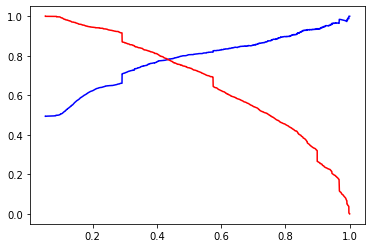

In [128]:
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

The cut-off point for the precision-recall curve also looks like to be around 0.44

In [129]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.300657          0    1    1    1    1    0    0    0   
1          0         0.141863          0    1    1    0    0    0    0    0   
2          1         0.127502          0    1    1    0    0    0    0    0   
3          1         0.291393          0    1    1    1    0    0    0    0   
4          1         0.966890          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    1    1    1                1

In [130]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7892849136964806

In [131]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1852,  460],
       [ 480, 1669]], dtype=int64)

In [132]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [133]:
# Calculate Precision

TP/(TP+FP)

0.7839361202442461

In [134]:
# Calculate Recall

TP/(TP+FN)

0.7766402978129362

##### The cut-off point of 0.44 seems like a decent value to proceed

### Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [135]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [136]:
y_test_pred[:10]

4771    0.997298
6122    0.129863
9202    0.704465
6570    0.302359
2668    0.721305
4233    0.793232
3368    0.703788
9091    0.464227
5972    0.283500
3631    0.786883
dtype: float64

In [137]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [138]:
# Let's see the head

y_pred_1.head()

0
4771  0.997298
6122  0.129863
9202  0.704465
6570  0.302359
2668  0.721305

In [139]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [140]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [141]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [142]:
# Check 'y_pred_final'

y_pred_final.head()

Converted         0
0          1  0.997298
1          0  0.129863
2          0  0.704465
3          1  0.302359
4          1  0.721305

In [143]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [144]:
# Let's see the head of y_pred_final

y_pred_final.head()

Converted  Conversion_Prob
0          1         0.997298
1          0         0.129863
2          0         0.704465
3          1         0.302359
4          1         0.721305

In [145]:
# Make predictions on the test set using 0.44 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

In [146]:
# Check y_pred_final

y_pred_final.head()

Converted  Conversion_Prob  final_predicted
0          1         0.997298                1
1          0         0.129863                0
2          0         0.704465                1
3          1         0.302359                0
4          1         0.721305                1

In [147]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7871338912133892

In [148]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[801, 195],
       [212, 704]], dtype=int64)

In [149]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [150]:
# Calculate Precision

print("Precision:",TP/(TP+FP))
print("Recall:",TP/(TP+FN))

Precision: 0.7830923248053393
Recall: 0.7685589519650655


#### Both Training and Testing data have an accuracy of ~79%, Precision of ~78% and Recall of ~78% and ~77% in training and testing dataset. The model evaluation metrics are around 80% as expected by the CEO of X Education.
##### Metric values of ~80% is a decent score and was observed across both Sensitivity-Specificity and Precision-Recall evaluation techniques. Nevertheless there is always scope for improvement in the model design.

In [151]:
# Thus the most significant attributes that are deciding in terms of lead scoring are listed below:
for item in X_test.columns:
    print(item)

TotalVisits
Total Time Spent on Website
Lead Origin_Lead Add Form
Lead Source_Olark Chat
Do Not Email_Yes
Last Activity_Had a Phone Conversation
Last Activity_SMS Sent
What is your current occupation_Student
What is your current occupation_Unemployed
Last Notable Activity_Unreachable


# Conclusion

#### Model can help us specifically identify about 80% of the scoring visitors
- The best customer to quickly convert is the one who has been frequently visiting the site and those who are spending a significant amount of time on the website
- The customers that spend time filling a form are more probable to be converted
- Moreover, Olark chat and Welingak Website are influencal in identifying targetted customers and the leads generated by them are highly convertibly
- A customer connected via phone and sms are also expected to convert more comparative to the other group
- Customers who have specifically declined and unsubscribed the email conversations and who are unemployed or are students are least likely to convert